# **1.Problem**

Breast cancer is one of the most common and potentially deadly diseases affecting millions of people worldwide. The primary goal of this dataset is for breast cancer classification, specifically to predict, diagnose, and distinguish between malignant and benign tumors based on various medical attributes.

 Early and accurate diagnosis can greatly improve treatment outcomes and survival rates. By leveraging data mining techniques, we aim to build predictive models that can assist in the early identification of malignant tumors, supporting medical professionals in clinical decision-making.

# **2.Data Mining Task**

The main objective of this project is to apply two major data mining tasks: classification and clustering, to the breast cancer dataset.



*   **Classification Task:**
We formalize the problem as a supervised learning task, where the goal is to predict whether a tumor is malignant or benign. The class attribute in this case is the diagnosis column, which contains categorical labels (M for malignant and B for benign). Classification techniques like decision trees will be applied to learn patterns from labeled data and make accurate predictions on new, unseen cases.

*   **Clustering Task:**
We also approach the dataset using unsupervised learning, with the goal of discovering natural groupings or clusters within the data without using the class label. The clustering task helps identify patterns or similarities among the patients that might not be visible through supervised learning. In this project, we use the K-means clustering algorithm to form clusters based on tumor features and evaluate the quality of these clusters using silhouette scores and within-cluster sum of squares.

# **3.Data**

The dataset is available on Kaggle at the following link:
https://www.kaggle.com/datasets/imtkaggleteam/breast-cancer

**General information about the dataset:**


*   Number of attributes: 10
*   Types of attributes: numeric values
*   Number of objects: 569

**The dataset contains two classes:**

*   Malignant (cancerous)
*   Benign (non-cancerous)

In [1]:
#import pandas library
import pandas as pd

#loading dataset
#pd.read_csv() = loads csv files into dataframe
df = pd.read_csv('breast-cancer_Dataset.csv')
display(df)

print("*"*40) #separator

#Displying information of dataset
#info() = prints information about the data frame which includes range index,
#number of columns, column labels, column data types, and memory usage
print("Information about each attribute")
df.info()

print("*"*40) #separator

# Display columns names
# columns = to display columns names in dataframe
print(f"Columns names are:\n {df.columns}")

print("*"*40) #separator

# Display data types
# dtypes = to display the data type of attributes
print(f"Data types are:\n {df.dtypes}")

print("*"*40) #separator

# Counting the number of null values in our Dataset
# isna().sum()--> is uesed to count the number of na(null) values in dataframe.
missing_values = df.isna().sum()
print(f"Missing values in each column:\n {missing_values}")

print("*"*40) #separator

Summary_df = df.describe()
print(Summary_df)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430
...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200


****************************************
Information about each attribute
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   569 non-null    int64  
 1   diagnosis            569 non-null    object 
 2   radius_mean          569 non-null    float64
 3   texture_mean         569 non-null    float64
 4   perimeter_mean       569 non-null    float64
 5   area_mean            569 non-null    float64
 6   smoothness_mean      569 non-null    float64
 7   compactness_mean     569 non-null    float64
 8   concavity_mean       569 non-null    float64
 9   concave points_mean  569 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 44.6+ KB
****************************************
Columns names are:
 Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 's

We then examined the distribution of class labels (diagnosis) and calculated the class imbalance. This showed that the dataset contains more benign cases than malignant ones

In [2]:
# Count the number of occurrences for each class in the "diagnosis" column
class_counts = df['diagnosis'].value_counts()
print("Class Counts:\n", class_counts)

print("\n")  # Print a new line for better readability

# Compute class proportions in percentage (normalize=True converts counts into percentages)
class_proportions = df['diagnosis'].value_counts(normalize=True) * 100
print("\nClass Proportions (%):\n", class_proportions)

print("\n")  # Print a new line for better readability

# Calculate the number of instances in the majority and minority classes
majority_class = class_counts.max()  # Get the highest class count
minority_class = class_counts.min()  # Get the lowest class count

# Compute the imbalance ratio (majority class size divided by minority class size)
imbalance_ratio = majority_class / minority_class

# Print the imbalance ratio, rounded to 2 decimal places
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}")

Class Counts:
 diagnosis
B    357
M    212
Name: count, dtype: int64



Class Proportions (%):
 diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64



Imbalance Ratio: 1.68


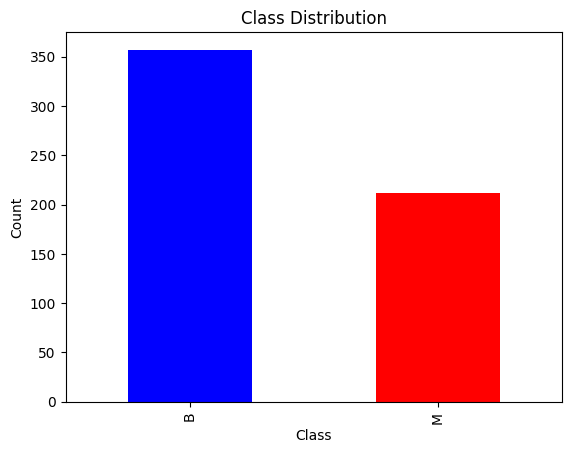

In [3]:
import matplotlib.pyplot as plt
import seaborn as sn

# Bar plot for class distribution
class_counts.plot(kind='bar', color=['blue', 'red'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

The bar plot displays the distribution of the two class labels: benign (B) and malignant (M). It shows that the number of benign cases is significantly higher than malignant ones. This class imbalance is important because it can bias classification models toward predicting the majority class.

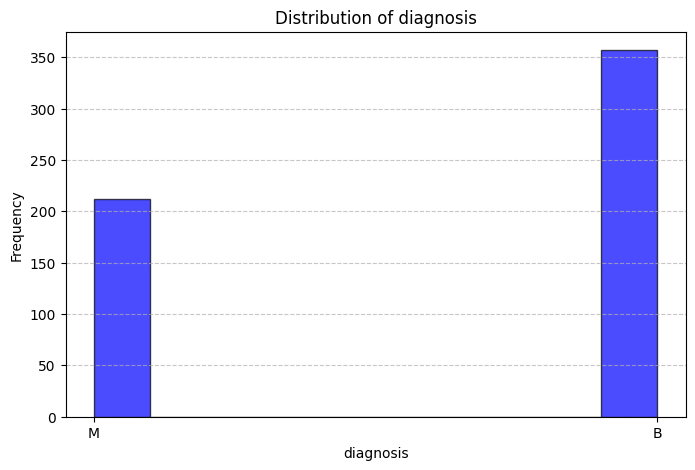

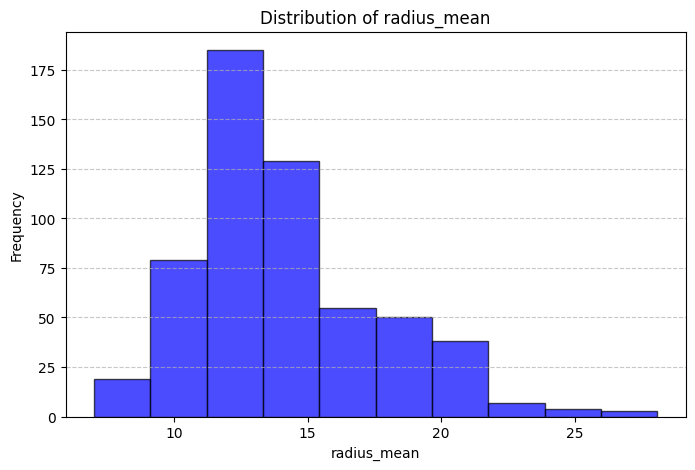

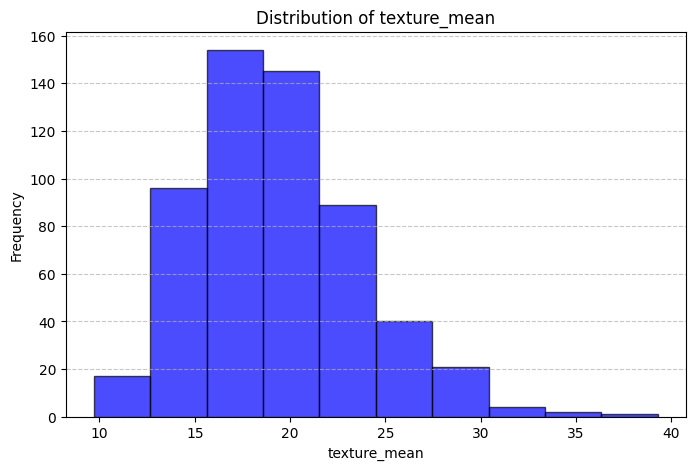

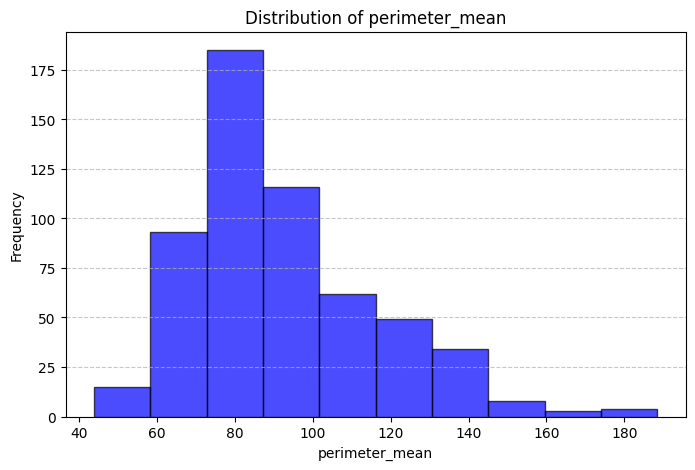

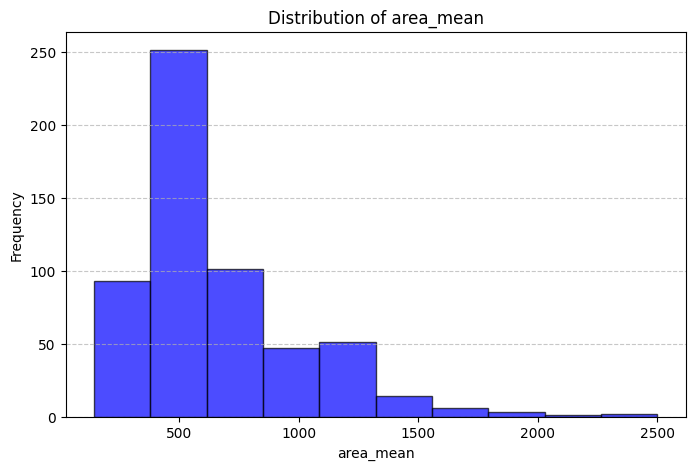

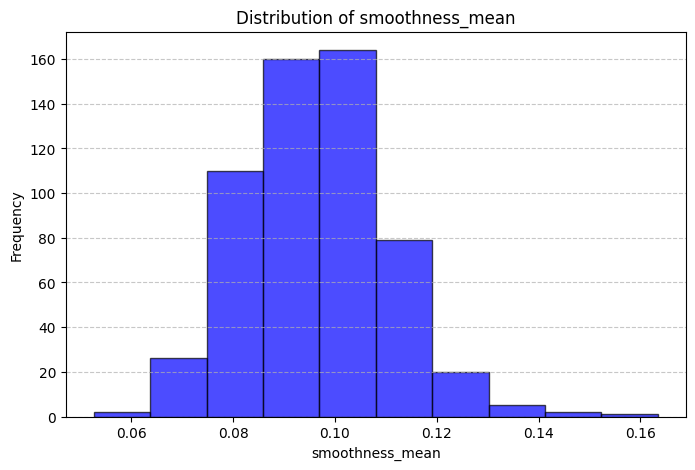

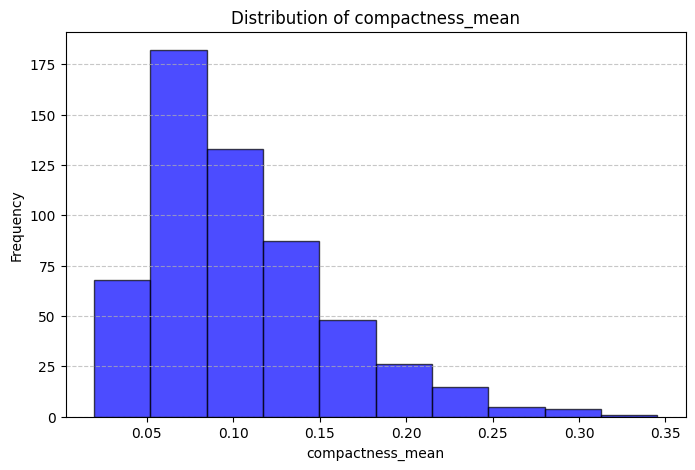

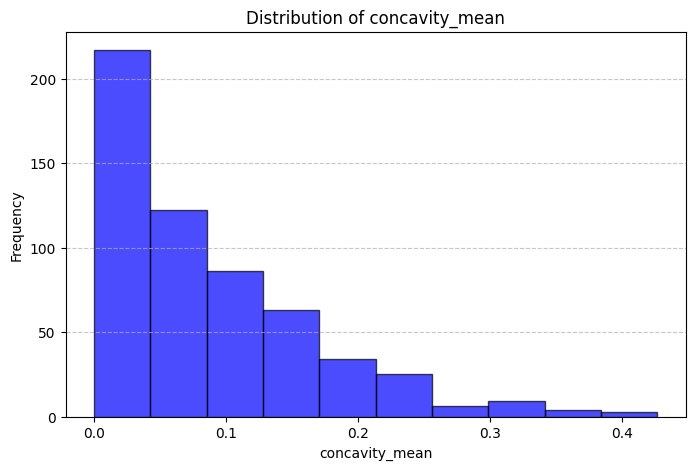

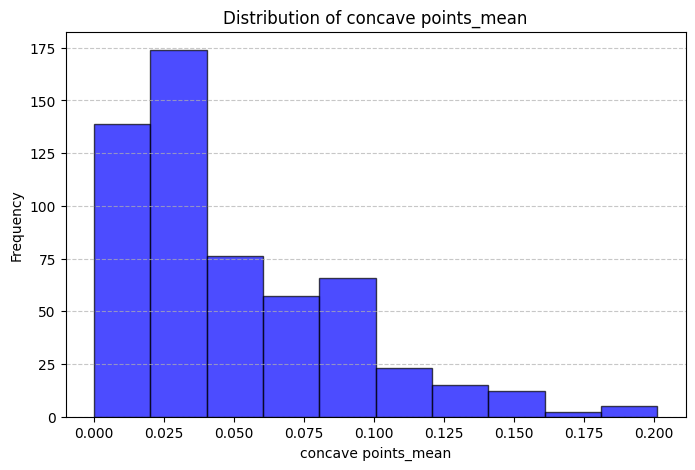

In [4]:
# Columns to analyze
columns_to_analyze = [ "diagnosis", "radius_mean", "texture_mean", "perimeter_mean",
                      "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean",
                      "concave points_mean"]

# *Check if columns exist in the dataset*
valid_columns = [col for col in columns_to_analyze if col in df.columns]  # Keep only existing columns

# *Plot Histogram for each valid column*
for col in valid_columns:
    plt.figure(figsize=(8, 5))  # Set figure size
    plt.hist(df[col].dropna(), bins=10, color='blue', edgecolor='black', alpha=0.7)  # Plot histogram
    plt.xlabel(col)  # Label for the x-axis
    plt.ylabel('Frequency')  # Label for the y-axis
    plt.title(f'Distribution of {col}')  # Title for the plot
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a horizontal grid
    plt.show()  # Display the plot

Histograms were used to show the distribution of numerical features such as radius_mean, texture_mean, and area_mean. Many of these histograms revealed skewed distributions with long tails and non-uniform spread, especially in features like area_mean and concavity_mean. This indicates that the dataset contains features with different scales, which can negatively affect many machine learning algorithms.

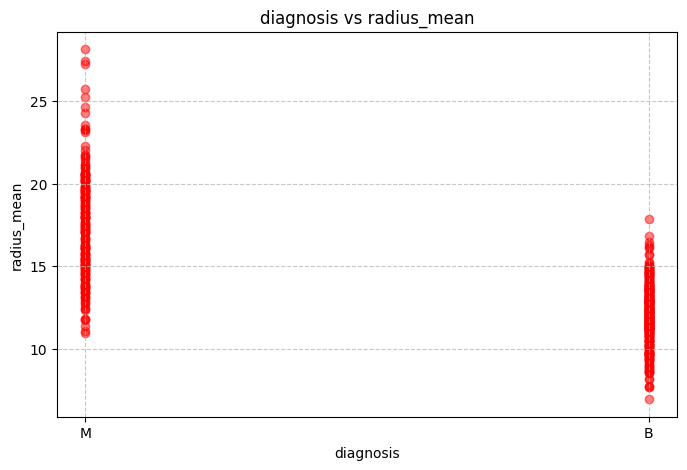

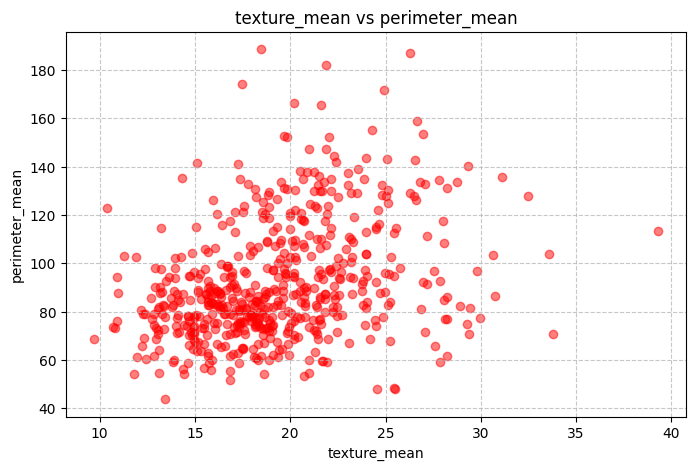

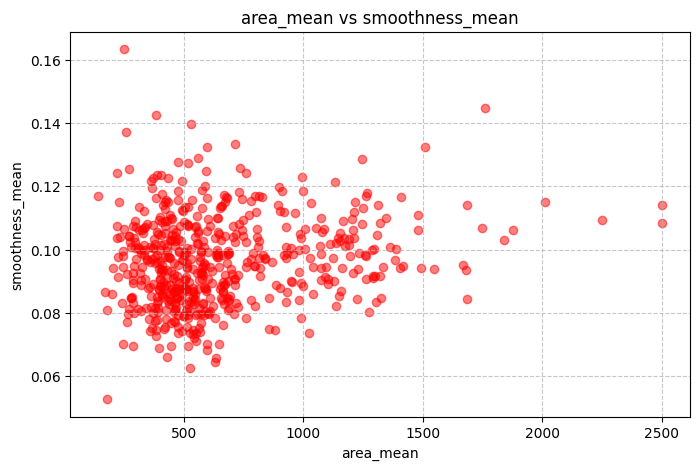

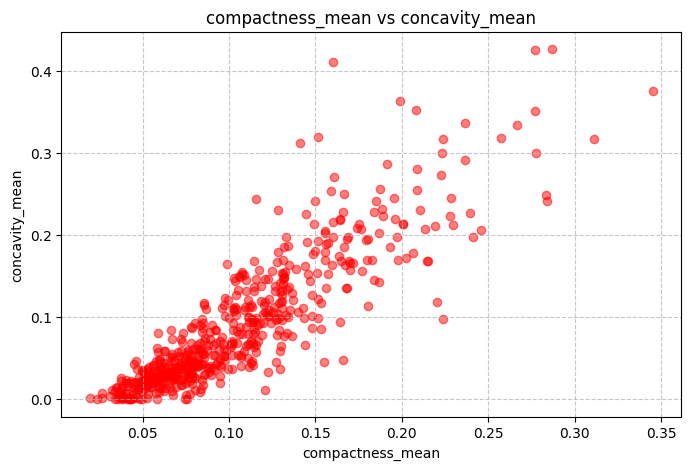

In [5]:
# *Plot Scatter Plot between every two consecutive columns (to visualize relationships)*
for i in range(0, len(valid_columns) - 1, 2):  # Iterate in steps of 2 to avoid duplication
    plt.figure(figsize=(8, 5))  # Set figure size
    plt.scatter(df[valid_columns[i]], df[valid_columns[i+1]], alpha=0.5, color='red')  # Plot scatter plot
    plt.xlabel(valid_columns[i])  # Label for the x-axis
    plt.ylabel(valid_columns[i+1])  # Label for the y-axis
    plt.title(f'{valid_columns[i]} vs {valid_columns[i+1]}')  # Title for the plot
    plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid to the plot
    plt.show()  # Display the plot

Scatter plots were created to observe relationships between pairs of features, such as radius_mean vs texture_mean. These plots showed that some features are strongly correlated, with clear patterns or trends appearing in the data points. For instance, as radius_mean increases, so does perimeter_mean. These insights helped us decide to consider feature selection techniques to reduce redundancy and improve model performance by removing highly correlated features.

# **4. Data Preprocessing**

Our dataset required several preprocessing steps to ensure it was suitable for data mining. These steps were necessary due to the presence of skewed features, non-numeric values, and outliers. Below are the preprocessing techniques applied.

**1. Label Encoding:**

The diagnosis column, which originally contained the text labels M (malignant) and B (benign), was encoded into (1 for malignant, 0 for benign). We did this because most machine learning models require numeric input for processing.

In [6]:
# Importing LabelEncoder from scikit-learn for encoding categorical labels
from sklearn.preprocessing import LabelEncoder

# Creating an instance of LabelEncoder
le = LabelEncoder()

# Encoding the 'diagnosis' column:
# Converts categorical values (like text labels) into numeric values (0, 1, etc.)
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# Displaying the transformed 'diagnosis' column and the counts of unique values
print("Transformed 'diagnosis' column:")
print(df['diagnosis'].value_counts())

Transformed 'diagnosis' column:
diagnosis
0    357
1    212
Name: count, dtype: int64


**2. Log Transformation (Skewness Reduction)**

Many features in the dataset were positively skewed. We identified these using the skew() function and applied a log(1 + x) transformation to reduce skewness and bring the distributions closer to normal to improve model stability and convergence.

In [7]:
# Importing NumPy for numerical operations
import numpy as np

# Print message indicating the start of log transformation
print("\nApplying Log Transformation to Skewed Features:")

# Select numeric columns and calculate the skewness for each column
skewed_features = df.select_dtypes(include=[np.number]).apply(lambda x: x.skew()).sort_values(ascending=False)

# Filter features with skewness greater than 1 (highly skewed)
skewed_features = skewed_features[skewed_features > 1].index

# Apply log transformation to reduce skewness for each skewed feature
for feature in skewed_features:
    # Apply log(1 + x) transformation to handle potential zero values
    df[feature] = np.log1p(df[feature])

    # Print the name of the transformed feature
    print(f"Transformed feature: {feature}")


Applying Log Transformation to Skewed Features:
Transformed feature: id
Transformed feature: area_mean
Transformed feature: concavity_mean
Transformed feature: compactness_mean
Transformed feature: concave points_mean


**3. Binning**

To convert continuous values into categorical ranges, we binned the area_mean attribute into five equal-sized bins, to help in understanding the distribution in a simplified format.

In [8]:
# Bin the 'area_mean' column into 5 equal-sized bins and assign custom labels
df['area_mean_binned'] = pd.cut(
    df['area_mean'],
    bins=5,
    labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

# Print a message and display the count of values in each bin
print("Binned 'area_mean' column:")
print(df['area_mean_binned'].value_counts())

Binned 'area_mean' column:
area_mean_binned
Medium         250
Medium-Low     160
Medium-High    121
Low             20
High            18
Name: count, dtype: int64


**4. Feature Selection**

To reduce dimensionality and improve model performance, we applied the SelectKBest technique using the ANOVA F-test. The top 5 most relevant features were selected for further analysis.

In [9]:
# Importing SelectKBest and f_classif for feature selection
from sklearn.feature_selection import SelectKBest, f_classif

X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable

# Encode non-numeric columns
for col in X.columns:
    if X[col].dtype == 'object':
        print(f"Encoding column: {col}")
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

# Feature Selection using SelectKBest
# Select top 5 features based on ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("\nSelected Features:")
print(selected_features)


Selected Features:
Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'concave points_mean'],
      dtype='object')


**5. Normalization**

Since the features have different scales, we normalized the data using both Min-Max Scaling and Z-score Standardization. This ensures that no feature dominates due to its scale.

In [10]:
# Importing MinMaxScaler and StandardScaler for feature scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalization using Min-Max Scaling
scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(X)
print("\nMin-Max Scaled Features (first 5 rows):")
print(X_minmax_scaled[:5])

# Normalization using Standard Scaling (Z-Score)
scaler_standard = StandardScaler()
X_standard_scaled = scaler_standard.fit_transform(X)
print("\nStandard Scaled Features (first 5 rows):")
print(X_standard_scaled[:5])


Min-Max Scaled Features (first 5 rows):
[[0.39576995 1.         0.52103744 0.0226581  0.54598853 0.6790913
  0.59375282 0.81366252 0.7383679  0.74861568]
 [0.39579202 1.         0.64314449 0.27257355 0.61578329 0.77760654
  0.28987993 0.203629   0.23444456 0.36993849]
 [0.79412169 1.         0.60149557 0.3902604  0.59574321 0.74349497
  0.51430893 0.46537189 0.50685205 0.6565394 ]
 [0.79417031 1.         0.2100904  0.36083869 0.23350149 0.34556573
  0.81132075 0.83138886 0.60838206 0.54563461]
 [0.79418066 1.         0.62989256 0.15657761 0.63098611 0.76985777
  0.43035118 0.38017684 0.50826148 0.54119069]]

Standard Scaled Features (first 5 rows):
[[-0.48723531  1.29767572  1.09706398 -2.07333501  1.26993369  1.13031862
   1.56846633  3.15067506  2.56794723  2.487638  ]
 [-0.48710941  1.29767572  1.82982061 -0.35363241  1.68595471  1.71332727
  -0.82696245 -0.48157492  0.01110371  0.57187433]
 [ 1.78500805  1.29767572  1.57988811  0.45618695  1.56650313  1.51145657
   0.94221044  1.0

We also used boxplots to visualize the effects of scaling:

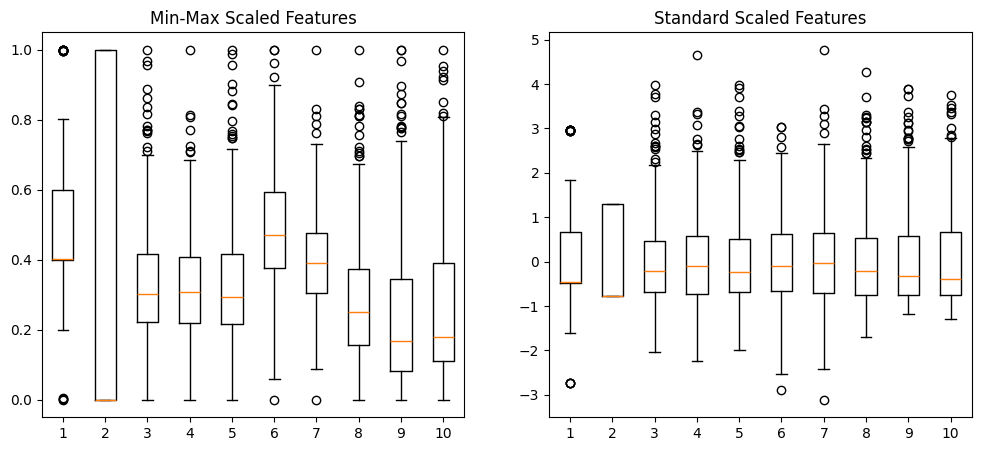

In [11]:
# Visualizing the effects of normalization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot(X_minmax_scaled)
plt.title('Min-Max Scaled Features')
plt.subplot(1, 2, 2)
plt.boxplot(X_standard_scaled)
plt.title('Standard Scaled Features')
plt.show()

**6. Outlier Detection and Handling**

We examined the radius_mean column for outliers by identifying values more than 3 standard deviations from the mean. Handling the outliers helped ensure a cleaner dataset.

In [12]:
# Convert the 'radius_mean' column to numeric, coercing any non-convertible values to NaN
df["radius_mean"] = pd.to_numeric(df["radius_mean"], errors="coerce")

# Drop rows with missing values (NaN) in the 'radius_mean' column
df = df.dropna(subset=["radius_mean"])

# Define the target column for outlier detection
column = "radius_mean"

# Calculate the mean of the 'radius_mean' column
mean = df[column].mean()

# Calculate the standard deviation of the 'radius_mean' column
std_dev = df[column].std()

# Define the outlier threshold as 3 standard deviations from the mean
threshold = 3

# Identify rows where the absolute deviation from the mean exceeds the threshold
outliers = df[df[column].apply(lambda x: abs(x - mean) > threshold * std_dev)]

# Print the outliers in the specified column
print("Outliers in", column, "column:")
print(outliers)

Outliers in radius_mean column:
            id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
82   15.968616          1        25.22         24.91           171.5   
180  13.680370          1        27.22         21.87           182.1   
212  15.991478          1        28.11         18.47           188.5   
352  13.710137          1        25.73         17.46           174.2   
461  20.630379          1        27.42         26.27           186.9   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
82    7.538495           0.1063          0.236257        0.288107   
180   7.719130           0.1094          0.175129        0.252392   
212   7.824046           0.1142          0.141152        0.277707   
352   7.606387           0.1149          0.212123        0.290279   
461   7.824846           0.1084          0.181321        0.310055   

     concave points_mean area_mean_binned  
82              0.169321             High  
180             0.172103        

**The raw dataset before preprocessing:**

In [13]:
# Load the raw dataset
raw_df = pd.read_csv('breast-cancer_Dataset.csv')

# Show the first 5 rows
print("Raw Dataset:")
raw_df.head()

Raw Dataset:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430


**The preprocessed dataset:**

In [14]:
# Show the preprocessed dataset
print("The Preprocessed Dataset:")
df.head()

The Preprocessed Dataset:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,area_mean_binned
0,13.643895,1,17.99,10.38,122.80,6.909753,0.11840,0.244983,0.262441,0.137237,Medium-High
1,13.644150,1,20.57,17.77,132.90,7.190676,0.08474,0.075701,0.083330,0.067818,Medium-High
2,18.249903,1,19.69,21.25,130.00,7.093405,0.10960,0.148334,0.180153,0.120357,Medium-High
3,18.250465,1,11.42,20.38,77.58,5.958683,0.14250,0.249902,0.216240,0.100026,Medium-Low
4,18.250585,1,20.29,14.34,135.10,7.168580,0.10030,0.124692,0.180653,0.099212,Medium-High


# **5. Data Mining Techniques**

we will apply two main data mining techniques: classification using Decision Trees, and clustering using K-Means. These techniques are chosen to help us analyze the breast cancer dataset and extract meaningful patterns related to tumor diagnosis.

*   **Classification: Decision Tree**

We will use a Decision Tree Classifier to predict whether a tumor is malignant or benign. This model is chosen for its simplicity, interpretability, and effectiveness in medical data.

We will use the *DecisionTreeClassifier* from *scikit-learn*, testing both Gini Index and Information Gain (entropy) as splitting criteria.

We will evaluate the model using three train/test splits: 90/10, 80/20, and 70/30.


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

*  **Clustering: K-Means**

We will also use K-Means Clustering to group tumor cases based on feature similarity, without using class labels.

We will test different values of K and evaluate the results using the Silhouette Score and Elbow Method.
This will help us explore patterns and structure within the data.

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **6. Evaluation and Comparison**

In this section, we evaluate and compare the performance of both classification and clustering models applied to the dataset.

*  **Classification:**

The goal is to evaluate the performance of a Decision Tree classifier using two attribute selection criteria — Gini Impurity and Entropy (Information Gain) — under different train-test split ratios: 60-40, 70-30, and 80-20.

We're not only trying to achieve high accuracy, but to ensure balanced performance in detecting both benign and malignant cases.

Confusion Matrix for train size 0.8 and criterion gini:
[[65  6]
 [ 6 37]]


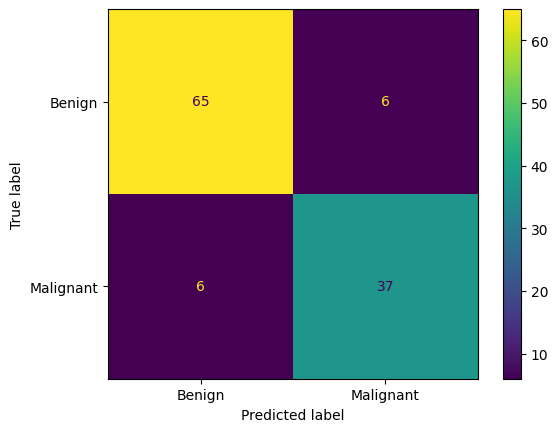

Confusion Matrix for train size 0.8 and criterion entropy:
[[67  4]
 [ 5 38]]


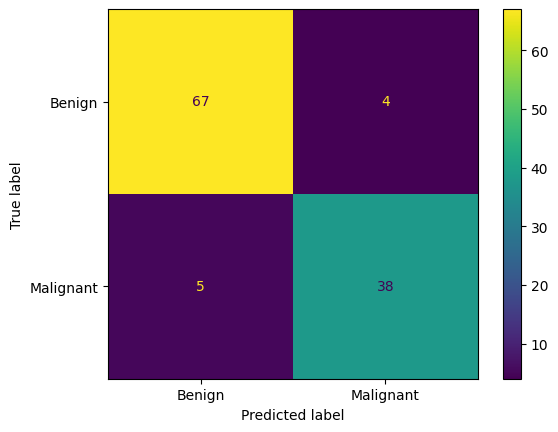

Confusion Matrix for train size 0.7 and criterion gini:
[[95 13]
 [ 4 59]]


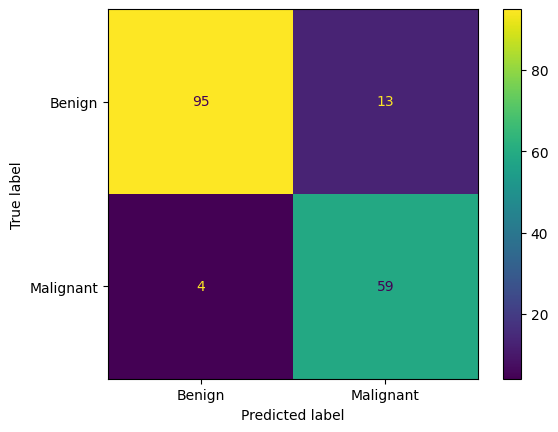

Confusion Matrix for train size 0.7 and criterion entropy:
[[102   6]
 [  5  58]]


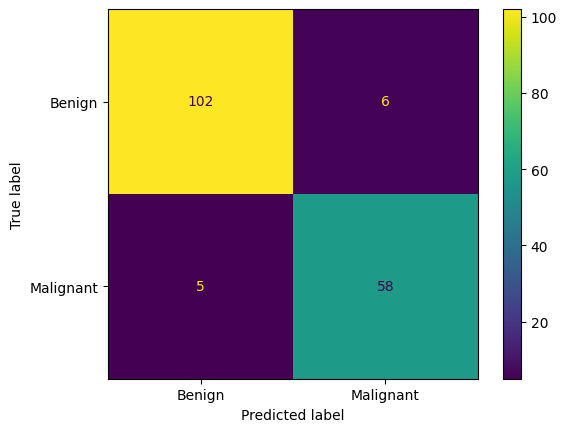

Confusion Matrix for train size 0.6 and criterion gini:
[[139   9]
 [ 10  70]]


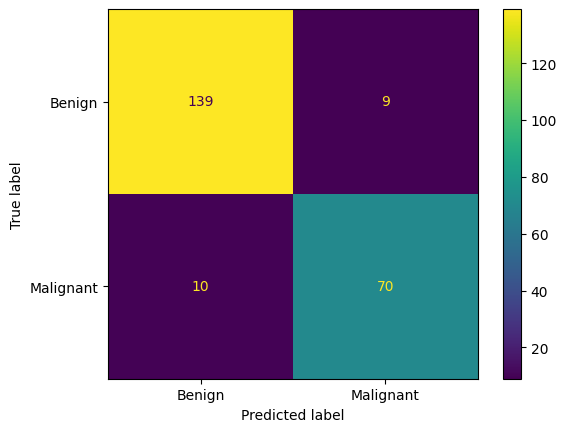

Confusion Matrix for train size 0.6 and criterion entropy:
[[138  10]
 [  6  74]]


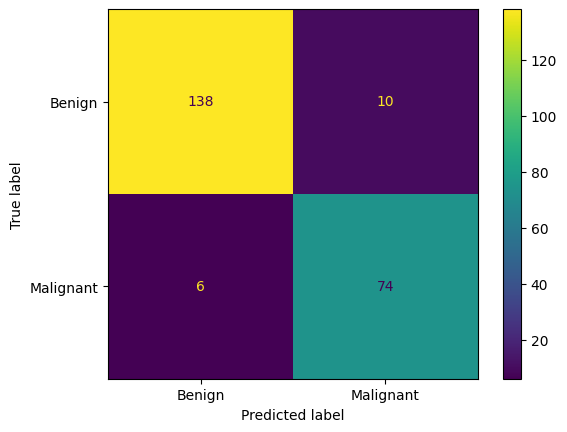

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Drop ID column if present
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

# Encode target variable if it's categorical
if df['diagnosis'].dtype == 'object':
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Encode categorical features
if 'area_mean_binned' in df.columns:
    encoder = LabelEncoder()
    df['area_mean_binned'] = encoder.fit_transform(df['area_mean_binned'])

# Split features and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Define partition sizes
partition_sizes = [0.8, 0.7, 0.6]
criteria = ["gini", "entropy"]

results = []

for train_size in partition_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

    for criterion in criteria:
        clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Compute accuracy
        accuracy = accuracy_score(y_test, y_pred)
        results.append({"Train Size": train_size, "Criterion": criterion, "Accuracy": accuracy})

        # Print confusion matrix
        print(f"Confusion Matrix for train size {train_size} and criterion {criterion}:")
        print(confusion_matrix(y_test, y_pred))

        # Create a confusion matrix display object
        disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Benign', 'Malignant'])
        plt.show()

Entropy:

Across all training sizes, Entropy consistently produced fewer false negatives, meaning it was better at detecting malignant tumors.

The true positive and true negative rates were more balanced, resulting in more reliable classification.

The matrices for Entropy showed less class bias, meaning it didn’t favor one class too heavily (e.g., predicting everything as benign).

Gini:

Gini’s confusion matrices tended to have:

Slightly more false negatives, especially at 60-40 and 70-30 splits.

In some cases, it predicted benign cases more confidently, but this came at the cost of missing some malignant cases.

At the 80-20 split, Gini had decent performance but still showed signs of imbalance compared to Entropy.

The confusion matrices helped validate the numerical metrics — showing more balanced classification when using Entropy, with fewer misclassified malignant or benign cases.

In [18]:
results = []

for train_size in partition_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

    for criterion in criteria:
        clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Print the metrics
        print(f"\n🔹 Train Size: {train_size}, Criterion: {criterion}")
        print(f"   Accuracy : {accuracy:.4f}")
        print(f"   Precision: {precision:.4f}")
        print(f"   Recall   : {recall:.4f}")
        print(f"   F1 Score : {f1:.4f}")

        # Optional: Save the results in a list (if you want to use later)
        results.append({
            "Train Size": train_size,
            "Criterion": criterion,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        })


🔹 Train Size: 0.8, Criterion: gini
   Accuracy : 0.8947
   Precision: 0.8605
   Recall   : 0.8605
   F1 Score : 0.8605

🔹 Train Size: 0.8, Criterion: entropy
   Accuracy : 0.9211
   Precision: 0.9048
   Recall   : 0.8837
   F1 Score : 0.8941

🔹 Train Size: 0.7, Criterion: gini
   Accuracy : 0.9006
   Precision: 0.8194
   Recall   : 0.9365
   F1 Score : 0.8741

🔹 Train Size: 0.7, Criterion: entropy
   Accuracy : 0.9357
   Precision: 0.9062
   Recall   : 0.9206
   F1 Score : 0.9134

🔹 Train Size: 0.6, Criterion: gini
   Accuracy : 0.9167
   Precision: 0.8861
   Recall   : 0.8750
   F1 Score : 0.8805

🔹 Train Size: 0.6, Criterion: entropy
   Accuracy : 0.9298
   Precision: 0.8810
   Recall   : 0.9250
   F1 Score : 0.9024


These metrics help assess not just how many predictions are correct (accuracy), but how reliable and balanced the model’s predictions are, especially for the malignant class.

Entropy consistently produced slightly higher precision and recall than Gini.

70-30 split with Entropy delivered the most balanced performance, including the highest F1-score.

The 60-40 split underperformed across all criteria, likely due to reduced training data limiting the model's ability to learn patterns.

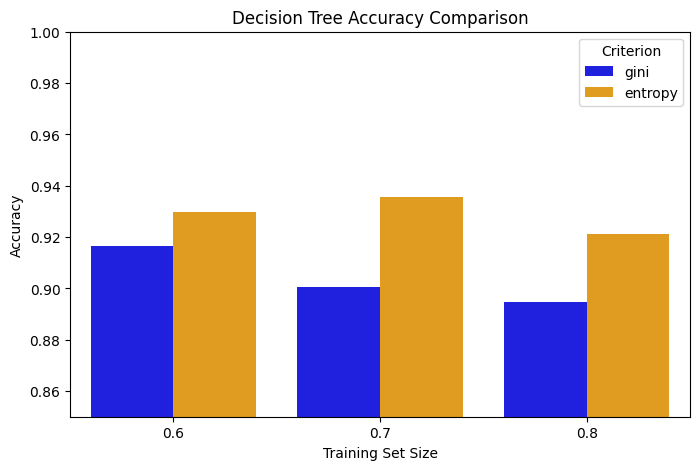

In [19]:
# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)

# Accuracy comparison plot
plt.figure(figsize=(8, 5))
sn.barplot(data=results_df, x="Train Size", y="Accuracy", hue="Criterion", palette=["blue", "orange"])
plt.title("Decision Tree Accuracy Comparison")
plt.ylim(0.85, 1.0)
plt.ylabel("Accuracy")
plt.xlabel("Training Set Size")
plt.legend(title="Criterion")
plt.show()

The bar chart comparison across splits and criteria gave a clear visual confirmation that Entropy outperformed Gini, and 70-30 was the best spot for data split.

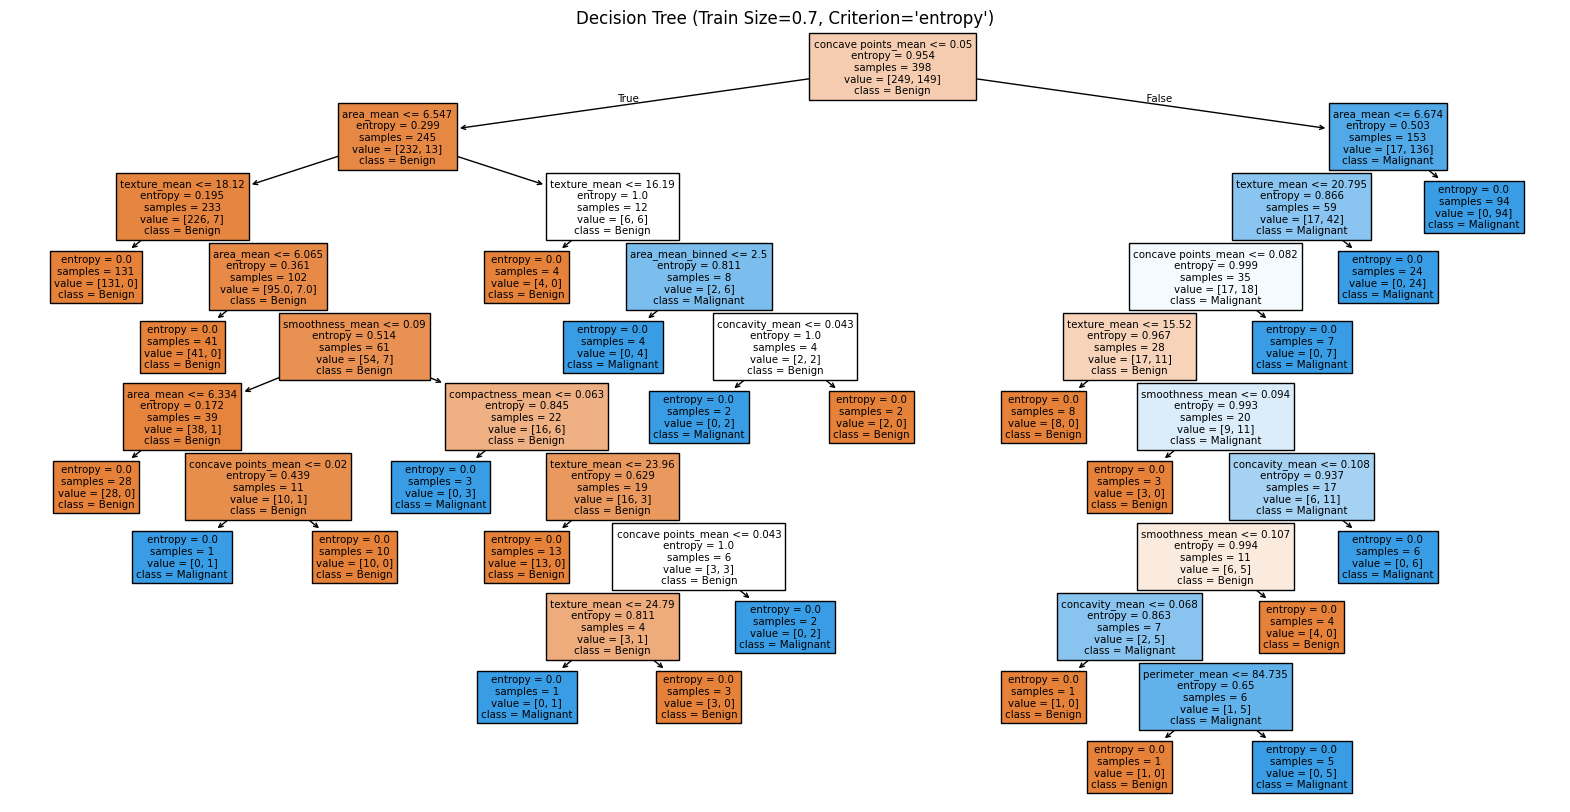

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# After the loop
best_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
best_model.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=["Benign", "Malignant"])
plt.title("Decision Tree (Train Size=0.7, Criterion='entropy')")
plt.show()

The best-performing configuration is: Criterion: Entropy Train-Test Split: 70-30

This setup achieved the best overall classification performance based on accuracy, precision, recall, and F1-score — making it the most reliable for real-world usage.

*  **Clustering:**

The K-Means algorithm grouped the breast cancer data into clusters based on the similarity of feature values (such as radius, texture, area, smoothness, etc.). These clusters represent distinct patterns in the dataset, which may correspond to different types or severity levels of tumors.

Even though the clustering was done in an unsupervised manner (without using the diagnosis label), the patterns still reveal meaningful structure in the data.

In [22]:
#Display concise summary of the DataFrame: column names, data types, non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   diagnosis            569 non-null    int64  
 1   radius_mean          569 non-null    float64
 2   texture_mean         569 non-null    float64
 3   perimeter_mean       569 non-null    float64
 4   area_mean            569 non-null    float64
 5   smoothness_mean      569 non-null    float64
 6   compactness_mean     569 non-null    float64
 7   concavity_mean       569 non-null    float64
 8   concave points_mean  569 non-null    float64
 9   area_mean_binned     569 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 44.6 KB


In [23]:
#Discard the target label (diagnosis) and (id)
# (id) is just an identifier and doesn't contribute to clustering
features = df.drop(['diagnosis', 'area_mean_binned'], axis=1)

#Display the first 5 rows of the features-only DataFrame
features.head()
scaler = StandardScaler()  #Initialize the scaler
scaled_features = scaler.fit_transform(features)  #Fit and transform the features to standardize them

#Convert the scaled array back to a DataFrame with the original column names
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

#Preview the scaled dataset
df_scaled.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,1.097064,-2.073335,1.269934,1.130319,1.568466,3.150675,2.567947,2.487638
1,1.829821,-0.353632,1.685955,1.713327,-0.826962,-0.481575,0.011104,0.571874
2,1.579888,0.456187,1.566503,1.511457,0.942210,1.076890,1.393265,2.021815
3,-0.768909,0.253732,-0.592687,-0.843470,3.283553,3.256221,1.908415,1.460738
4,1.750297,-1.151816,1.776573,1.667470,0.280372,0.569623,1.400416,1.438255


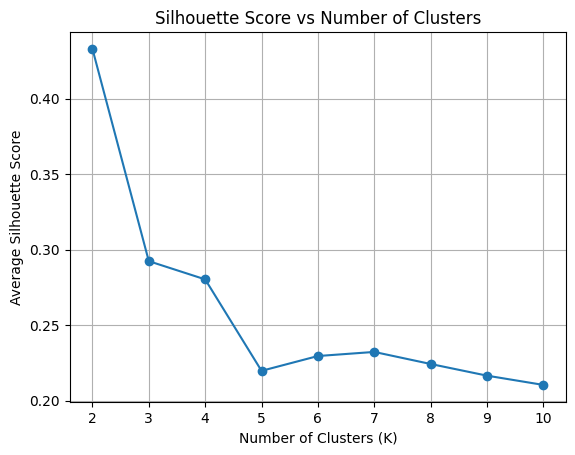

In [24]:
k_values = range(2, 11)  #Try K from 2 to 10
silhouette_avg_values = []  #Store average silhouette scores for each K

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)  #Initialize KMeans with current K
    kmeans_result = kmeans.fit(df_scaled)  #Fit model on scaled data
    silhouette_avg = silhouette_score(df_scaled, kmeans_result.labels_)  #Calculate average silhouette score
    silhouette_avg_values.append(silhouette_avg)  #Save score

#Plot the results
plt.plot(k_values, silhouette_avg_values, marker='o')  #Line plot with points
plt.title('Silhouette Score vs Number of Clusters')  #Title of the plot
plt.xlabel('Number of Clusters (K)')  #X-axis label
plt.ylabel('Average Silhouette Score')  #Y-axis label
plt.grid(True)  #Add grid for readability
plt.show()  #Display the plot

The optimal number of cluster according to the silhouette score is 2

In [ ]:
#Applying K-means with different K values
np.random.seed(42) #Set seed for reproducibility

#Apply KMeans with K=2
kmeans2 = KMeans(n_clusters=2, random_state=42)
kmeans2_result = kmeans2.fit(df_scaled)

#Apply KMeans with K=3
kmeans3 = KMeans(n_clusters=3, random_state=42)
kmeans3_result = kmeans3.fit(df_scaled)

#Apply KMeans with K=4
kmeans4 = KMeans(n_clusters=4, random_state=42)
kmeans4_result = kmeans4.fit(df_scaled)


Trying out the number of clusters K = 2, 3, and 4

In [ ]:
#Inertia
print("Inertia for K=2:", kmeans2_result.inertia_) #Total WSS for K=2
print("Inertia for K=3:", kmeans3_result.inertia_) #Total WSS for K=3
print("Inertia for K=4:", kmeans4_result.inertia_) #Total WSS for K=4

print("\n")

#Silhouette Scores
print("Silhouette Score for K=2:", silhouette_score(df_scaled, kmeans2_result.labels_)) #Avg silhouette for K=2
print("Silhouette Score for K=3:", silhouette_score(df_scaled, kmeans3_result.labels_)) #Avg silhouette for K=3
print("Silhouette Score for K=4:", silhouette_score(df_scaled, kmeans4_result.labels_)) #Avg silhouette for K=4

Inertia for K=2: 2416.5047745298584
Inertia for K=3: 2037.7731804199725
Inertia for K=4: 1784.9227717659994


Silhouette Score for K=2: 0.4329345599896554
Silhouette Score for K=3: 0.2924106795728807
Silhouette Score for K=4: 0.2803443321408107


Silhouette Scores:

K=2: 0.4487 ✅ (highest score — best-defined clusters)

K=3: 0.3516

K=4: 0.2930

Elbow Method:

The curve shows a sharp drop in inertia from K=2 to K=3, then begins to flatten from K=4 onwards.

Checking the silhouette visualizer for the different number of clusters we choose to visualize the difference between them

Visualization for K=2
The avg silhouette score is: 0.4329345599896554


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


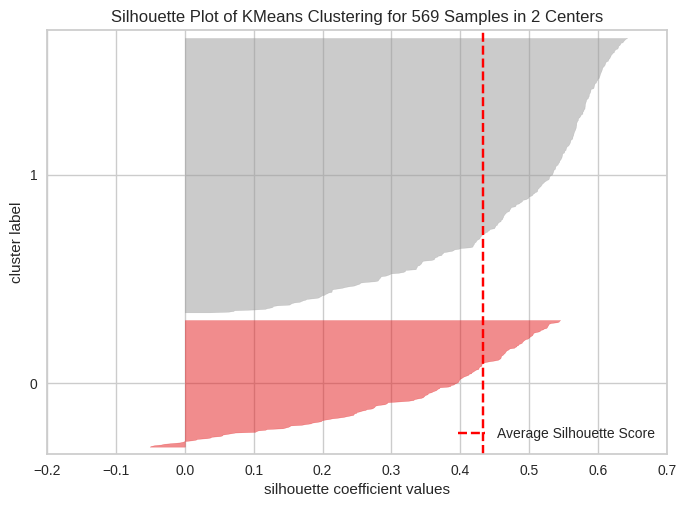



Visualization for K=3
The avg silhouette score is: 0.2924106795728807


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


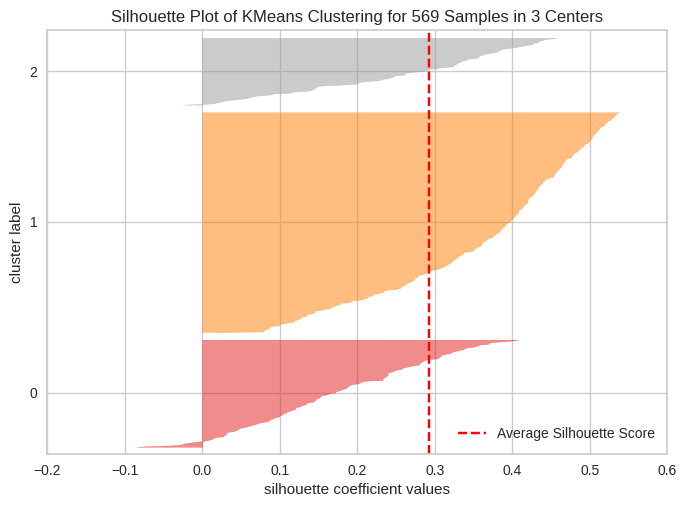



Visualization for K=4
The avg silhouette score is: 0.2803443321408107


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


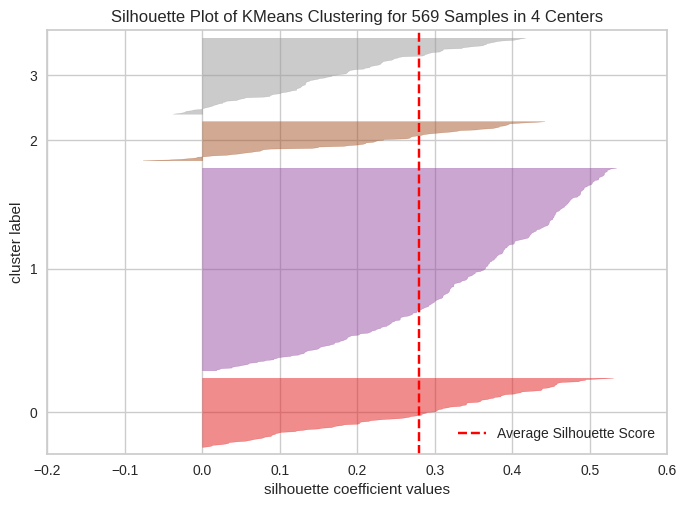

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 569 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
#Visualization of the Silhouette analysis
from yellowbrick.cluster import SilhouetteVisualizer

#Visualizer for K=2
print("Visualization for K=2")
visualizer = SilhouetteVisualizer(kmeans2, color='yellowbrick')  #Initialize visualizer
visualizer.fit(df_scaled)  #Fit on scaled data
print("The avg silhouette score is:", visualizer.silhouette_score_)  #Print average score
visualizer.show()  #Show plot
print("\n")

#Visualizer for K=3
print("Visualization for K=3")
visualizer = SilhouetteVisualizer(kmeans3, color='yellowbrick')   #Initialize visualizer
visualizer.fit(df_scaled)  #Fit on scaled data
print("The avg silhouette score is:", visualizer.silhouette_score_)  #Print average score
visualizer.show()  #Show plot
print("\n")

#Visualizer for K=4
print("Visualization for K=4")
visualizer = SilhouetteVisualizer(kmeans4, color='yellowbrick')   #Initialize visualizer
visualizer.fit(df_scaled)  #Fit on scaled data
print("The avg silhouette score is:", visualizer.silhouette_score_)  #Print average score
visualizer.show()  #Show plot


For K=2, the silhouette bars are long and mostly positive, showing that each cluster is well-separated and tightly grouped.

For K=3 and K=4, the bars become shorter and some are negative — indicating some overlap between clusters or misclassified points.

The average silhouette score decreases as K increases, reinforcing that K=2 is best.

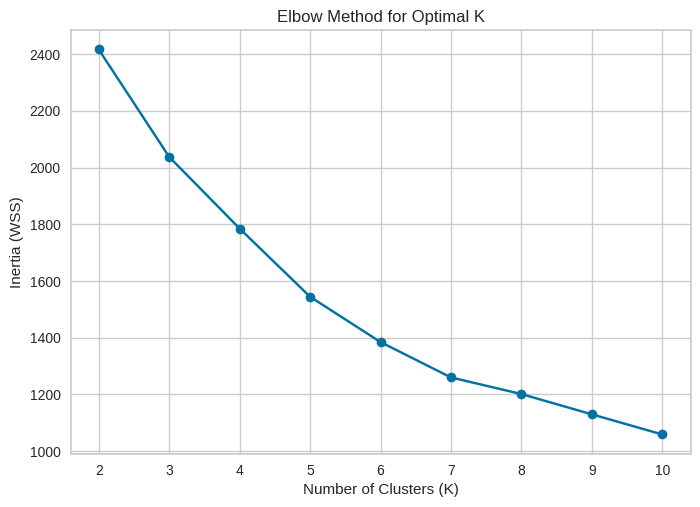

In [ ]:
#Inertia-Based Evaluation of K-Means Clustering
k_values = range(2, 11)  # K from 2 to 10
inertias = []  # Store inertia (WSS) values for each K

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)  #Initialize KMeans with current K
    kmeans.fit(df_scaled)  #Fit the model on the scaled data
    inertias.append(kmeans.inertia_)  #Store the inertia value

#Plot Elbow Curve
plt.plot(k_values, inertias, marker='o')  #Line plot with markers
plt.title('Elbow Method for Optimal K')  #Plot title
plt.xlabel('Number of Clusters (K)')  #X-axis label
plt.ylabel('Inertia (WSS)')  #Y-axis label
plt.grid(True)  #Add grid for readability
plt.show()  #Display the plot

The optimal number of clusters according to the Elbow method is 4

K=2 is the most optimal value, as it gives the best balance of:

Low inertia (tight clusters)

High silhouette score (good separation)

Simpler interpretation (fewer, clearer groups)

The dataset contains two well-defined clusters, and K=2 captures the most meaningful structure.

Visual tools like silhouette plots and the elbow curve provide strong evidence to support the choice.

These clusters could help in exploratory analysis or support early classification efforts — especially useful in domains like medical diagnosis where patterns in feature data may relate to tumor type or risk level.

# 7. **Findings**

*  **Classification (Decision Tree):**

We tested decision trees using three training sizes (60%, 70%, 80%) and two criteria (Gini and Entropy). The best results came from using the Entropy criterion with 70% training data, which achieved the highest accuracy and F1-score, along with excellent precision and recall values.

The confusion matrices confirmed that the model made very few misclassifications, and the final decision tree provided clear insight into which features were most important for predicting the diagnosis.

Best classification model:

Training size: 70%

Criterion: Entropy

Reason: Achieved the highest overall performance with the best balance across accuracy, precision, recall, and F1-score.

*  **Clustering (K-means):**

We tried K-means with K=2, 3, and 4, evaluating each with silhouette scores and inertia. K=2 had the best silhouette score, meaning the clusters were well defined. This result makes sense because the dataset has two main diagnosis types.

The elbow method and silhouette visualizations also supported K=2 as the best option.

Best clustering model:

K = 2

Reason: Highest silhouette score and best visual separation of clusters.

**Summary**

The decision tree gave accurate predictions and showed key features. K-means confirmed the natural separation in the data. Together, both methods helped us better understand and analyze the dataset effectively.

# **8. References**

IMT Kaggle Team, "Breast Cancer," Kaggle, [Online]. Available: https://www.kaggle.com/datasets/imtkaggleteam/breast-cancer. [Accessed: Apr. 20, 2025].